<a href="https://colab.research.google.com/github/henriquepaes1/fraudesCartoes/blob/main/FraudeCart%C3%B5esML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Especialmente por conta da pandemia, as compras online aumentaram muito recentemente, e com isso, uma nova preocupação surgiu dentre as intituições financeiras: **as fraudes**. A Clearsale apontou um aumento de 32,7% nos casos de fraude no primeiro semestre de 2021, quando ocorreram 2,6 milhões de tentativas de golpe em 182 milhões de transações.

A maioria das fraudes ocorrem quando golpistas conseguem dados de cartões na internet, ou através de phishing, e a partir daí tentam realizar compras online com cartões de outras pessoas.

As fraudes, especialmente aquelas relacionadas à cartões de crédito, são as que mais recebem atenção das instituições, pois os prejuízos podem ser muito grandes, e a reputação para com os clientes é afetada, por isso, cada vez mais as empresas estão confiando na **inteligência artficial** para detecção de possíveis transações fraudulentas.

Com o grande volume de dados que essas empresas tem em posse, é possível construir soluções cada vez melhores para esse problea. Uma possível solução utlizando *Machine Learning* será apresentada neste artigo.

<p align=center>
<img src="https://images.unsplash.com/photo-1562813733-b31f71025d54?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=749&q=80" width="60%"></p>

## O dataset e metodologia

Os dados utilizados nesse projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações, o que indica um desbalanceamento entre os dados, pois as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA busca condensar as informações contidas em um grande número de variáves em um conjunto menor de recursos, chamados **componentes**. Os componentes, são expressos através de "frações" das variáveis originais (combinação linear, para aqueles familares com a Álgebra Linear). Os componentes, em geral, expressam a direção da maior variância dos valores, e não possuem nenhuma correlação entre si. Para ilustrar essa mudança, é possível dizer que geram-se dois novos eixos perpendiculares entre si (indica a ausência de correlação) e os valores agoras são calculados de acordo com a escala dos novos eixos, que condensam as informações de diversas outras variáveis.

Para execução da PCA, é necessário que haja padronização dos dados, a fim de que a análise não seja prejudicada pelas unidades de medida. Por isso, os dados do dataset utilizado são numéricos e adimensionais.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

Fontes: [Sigmoidal](https://sigmoidal.ai/), 
[Video introdutório à PCA](https://www.youtube.com/watch?v=VTYRwBKNPZk&ab_channel=AlcineiAzevedo-Dicaseaulas)


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as snb


Para facilitar a aquisição dos dados, foi criado pela equipe Sigmoidal um *link* com acesso direto ao `csv`. 

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)


Com os dados em mãos, já é possível começar a análise exploratória, isto é, começar a dissecar o problema.  

## Análise Exploratória

In [ ]:
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Estamos trabalhando com um dataset de {} linhas e {} colunas".format(df.shape[0], df.shape[1]))

Estamos trabalhando com um dataset de 284807 linhas e 31 colunas


Como já havia sido dito anteriormente, o dataset, após o PCA apresenta somente valores numéricos, então, análises envolvendo esses valores serão inconclusivas em primeiro momento. Abaixo, é possível notar que não há colunas com dados ausentes.

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

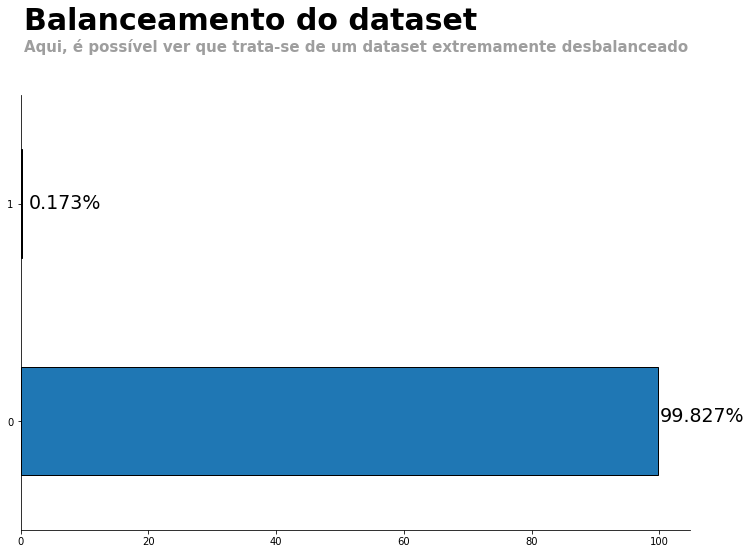

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

classes = df['Class'].value_counts()/df.shape[0]*100
fraudes = df.loc[df.Class == 1].value_counts().sum() /df.shape[0] * 100
normais = df.loc[df.Class == 0].value_counts().sum() /df.shape[0] * 100

ax = classes.plot(kind='barh', edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate('{:.3f}%'.format(fraudes), xy=(fraudes, 0.98), xytext=(7,0), textcoords='offset points', fontsize='19');
ax.annotate('{:.3f}%'.format(normais), xy=(normais, 0), xytext=(1,0), textcoords='offset points', fontsize='19');
ax.text(0.5, 1.8, "Balanceamento do dataset", fontsize='30', fontweight='heavy');
ax.text(0.5, 1.7, "Aqui, é possível ver que trata-se de um dataset extremamente desbalanceado", fontsize='15', color='#9E9E9E', fontweight='semibold');



In [ ]:
print("Apenas {:.3f}% das entradas representam fraudes".format(fraudes))

Apenas 0.173% das entradas representam fraudes
































## Preparação dos Dados



Agora que já sabemos como o dataset está disposto, é hora de trabalhar um poucos os dados antes de contruir o modelo.
Primeiramente, vamos **normalizar** os dados que ainda não foram pré-processados(coluna time e amount). O processo de normalização é necessário quando queremos trazer dados para uma escala comum, veja o que isso representa abaixo:

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Nas linhas acima, podemos ver que a média na coluna Time é muito maior do que a média na coluna Amount, isso porque, *Time* representa o tempo em segundos que se passou entre a primeira transação do dataset e a transação da entrada analisada. Por outro lado, *Amount* representa o quanto de dinheiro estava sendo movido em uma transação. Para que o poder de predição do nosso modelo não seja afetado por essa **diferença de escalas**, faremos a normalização.

Nosso método de normalização consistirá em duas etapas: separar os dados em treino e teste e depois normalizar cada uma das colunas com os máximos e mínimos das mesmas.

In [ ]:
# Importar as ferramentas necessárias
from sklearn.model_selection import train_test_split

# Definir as colunas target e feature
X = df.drop('Class', axis = 1) # Features
y = df['Class'] # Target

# Separar o dataset em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Importar as ferramentas necessárias
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Copiar o dataset para normalizar
df_feat_treino = X_train.copy()
df_feat_test = X_test.copy()

# Aplicando a normalização nos data sets

df_feat_treino['Time'] = scaler.fit_transform(np.array(df_feat_treino['Time']).reshape(-1, 1))
df_feat_test['Time'] = scaler.fit_transform(np.array(df_feat_test['Time']).reshape(-1, 1))
df_feat_treino['Amount'] = scaler.fit_transform(np.array(df_feat_treino['Amount']).reshape(-1, 1))
df_feat_test['Amount'] = scaler.fit_transform(np.array(df_feat_test['Amount']).reshape(-1, 1))


Nesta etapa, decidimos aplicar a normalização separadamente para cada dataset e cada variável separadamente a fim de obter maior "grau de pureza".


Após essa etapa, os valores de *Time* e *Amount*, antes possuindo suas próprias escalar agora estão descritos como valores numéricos adimensionais, que não influenciam tanto na análise. Veja normalização mais a fundo [aqui](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

A segunda etapa de preparo dos dados resolve um problema que foi apresentado anteriormente, que é o desbalanceamento. Como foi visto anteriormente, a porcentagem de dados com a Classe = 1, que indicam *fraude*, representam menos de 1% do nosso dataset, o que poderia afetar fortemente a acurácia do nosso sistema. 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


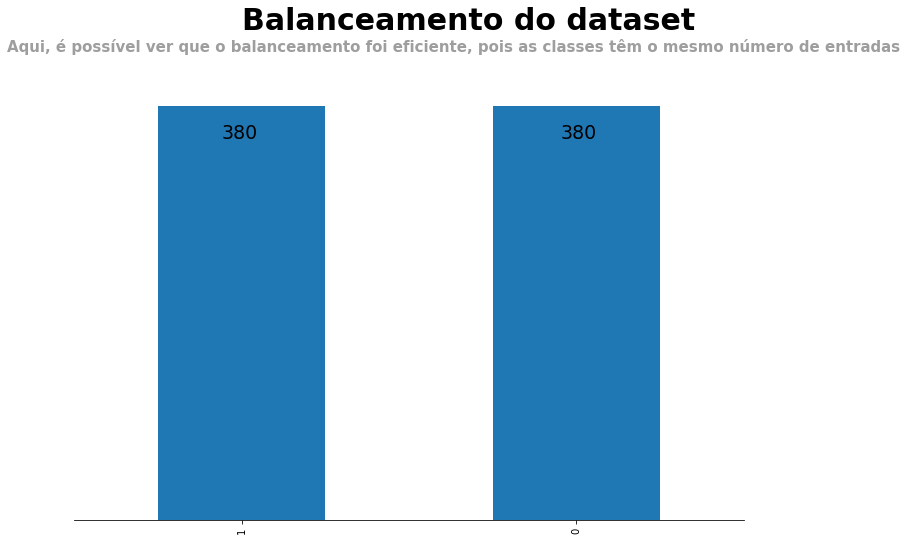

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

balancear = RandomUnderSampler(sampling_strategy='majority') # remover entradas com a classe majoritária

X_pronto_treino, y_pronto_treino = balancear.fit_sample(df_feat_treino, y_train)
X_pronto_treino = pd.DataFrame(X_pronto_treino, columns=df_feat_treino.columns)
y_pronto_treino = pd.Series(y_pronto_treino)

fig, ax = plt.subplots(figsize=(12, 8))

ax = y_pronto_treino.value_counts().plot(kind='bar')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.annotate('{}'.format(y_pronto_treino.value_counts()[0]), xy=(-0.08, 350), xytext=(7,0), textcoords='offset points', fontsize='19');
ax.annotate('{}'.format(y_pronto_treino.value_counts()[1]), xy=(0.95, 350), xytext=(1,0), textcoords='offset points', fontsize='19');
ax.text(0, 450, "Balanceamento do dataset", fontsize='30', fontweight='heavy');
ax.text(-0.7, 430, "Aqui, é possível ver que o balanceamento foi eficiente, pois as classes têm o mesmo número de entradas", fontsize='15', color='#9E9E9E', fontweight='semibold');


A técnica de balanceamento utilizada chama-se *Under sampling* e consiste basicamente em remover entradas da classe majoritária (Class = 0, quase 99% do dataframe) até que a razão entre as classes seja próxima a 0.5. Essa técnica foi escolhida, por ser computacionalmente simples, não alterar os dados da classe minoritária e funcionar bem com grande volume de dados. Para mais bibliografia sobre balanceamento, consulte:


* [Sigmoidal](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/)

* [Artigo Machine Learning Mastering](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/)

* [Documentação da biblioteca utilizada](https://imbalanced-learn.org/stable/under_sampling.html#)

A partir dessa etapa, os dados já estão prontos, agora basta criar o modelo e treiná-lo.

## Modelo de Machine Learning
Por tratar-se de um problema tradicional de classificação, testaremos 3 modelos diferentes, Regressão Logística, Árvore de decisões e o algortimo do K-ésimo Vizinho mais Próximo(kneighbors).


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

reg_logistica = LogisticRegression()
dec_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

reg_logistica.fit(X_pronto_treino, y_pronto_treino)
dec_tree.fit(X_pronto_treino, y_pronto_treino)
knn.fit(X_pronto_treino, y_pronto_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

A partir desse ponto, nosso modelo já está pronto para ser utilizado nos dados de teste.

In [ ]:
predict_log = reg_logistica.predict(df_feat_test)
predict_tree = dec_tree.predict(df_feat_test)
predict_knn = knn.predict(df_feat_test)


## Avaliar o desempenho do modelo
Agora que o modelo foi treinado e temos os dados do desempenho em mãos, vamos analisar se os resultados obtidos foram bons, comparando os três modelos.

In [ ]:
print("Métricas de avaliação para a Regressão Logística:\n\n\n", classification_report(y_test, predict_log))
print("\n")
print("Métricas de avaliação para a Árvore de decisão:\n\n\n", classification_report(y_test, predict_tree))
print("\n")
print("Métricas de avaliação para o K-neighbours:\n\n\n", classification_report(y_test, predict_knn))

Métricas de avaliação para a Regressão Logística:


               precision    recall  f1-score   support

           0       1.00      0.96      0.98     71090
           1       0.03      0.90      0.06       112

    accuracy                           0.96     71202
   macro avg       0.52      0.93      0.52     71202
weighted avg       1.00      0.96      0.98     71202



Métricas de avaliação para a Árvore de decisão:


               precision    recall  f1-score   support

           0       1.00      0.90      0.95     71090
           1       0.01      0.92      0.03       112

    accuracy                           0.90     71202
   macro avg       0.51      0.91      0.49     71202
weighted avg       1.00      0.90      0.95     71202



Métricas de avaliação para o K-neighbours:


               precision    recall  f1-score   support

           0       1.00      0.97      0.99     71090
           1       0.05      0.88      0.09       112

    accuracy                

Por enquanto, esses numeros não tem significado analítico, e essa é uma parte crítica do projeto. Como é possível ver no *report* existem diversas métricas, e algumas delas apresentam valores que chamam muita atenção, portanto, vamos analisá-las.

Agora nesse momento, você pode estar se perguntando se eu não deveria jogar os modelos no lixo, pois a precisão em nenhum dos três passou dos 5% de precisão na classe 1. É nesse momento que é importante saber com o que está trabalhando.

### **Justificando a baixa precisão do modelo**
Note, que anteriormente no nosso notebook o balanceamento foi feito somente no dataset de treino, para o dataset de teste, os dados ainda estavam desbalanceados, veja abaixo:

In [ ]:
y_test.value_counts()

0    71090
1      112
Name: Class, dtype: int64

Tomemos como exemplo a Árvore de decisões, que apresentou acurácia de apenas 1%. Veja como foi a matriz de correlação das previsões feitas por esse modelo.

0    71090
1      112
Name: Class, dtype: int64

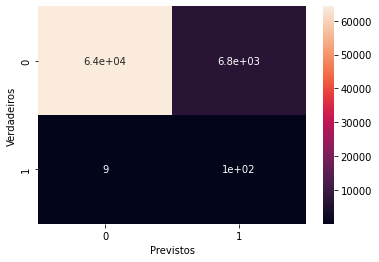

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, predict_tree), annot=True, ax=ax);
ax.set_xlabel("Previstos")
ax.set_ylabel("Verdadeiros");
y_test.value_counts()

Com esses dados, é possível tirar algumas conclusões, que se repetem para os demais modelos utilizados nos outros modelos de classificação. A precisão para a classe 1 foi baixa por conta do garnde números de **falsos positivos**, padrão que se repete para os outros modelos criados. 

E isso é necessariamente ruim? Não! Repare que os bancos digitais reprovam inúmeras compras diariamente, isso porque, o falso positivo causa menos problemas ao consumidor do que o falso negativo, note que, ocorreram apenas 9 falsos negativos na análise acima.

### Mas então, como avaliar?
Sabemos que existem outras métricas para avaliar o nosso modelo, e elas foram indicadas no *report*. A métrica que daremos mais atenção será o **recall** que, resumidamente indica dentre todas as fraudes, quantas o nossos modelos conseguiram identificar. Com isso, concluímos que os três modelos apresentaram métricas muito satisfatórias, destaque para a Árvore de Decisão, com 92% de recall.

## Conclusões
Com esse estudo, pudemos concluir que a matemática alinhada com a computação podem fazer uma excelente dupla para resolver grandes problemas do mundo corporativo contemporâneo. Nesse projeto, montamos um modelo capaz de detectar com sucesso fraudes em transações de cartão de crédito, mesmo quando essas eram minoria no conjunto de dados.

## Aprendizados
Com esse dataset simplificado do Kaggle, também foi possível obter aprendizados valiosos em relação à Machine Learning. O primeiro deles é que a análise exploratória é o primeiro passo para um modelo bem sucedido, ao passo que pode indicar ao desenvolvedor tratamentos que o *dataset* precisa ser submetido para que todo o conjunto de números faça sentido às ferramentas como o Sci-Kit learn. Outro aprendizado diz respeito às métricas de avaliação e a importância de entender o nosso problema e analisar com cuidado os nossos resultados, baseado no dataset e em outras métricas, como a matriz de confusão.
